Time: 0.2700517177581787


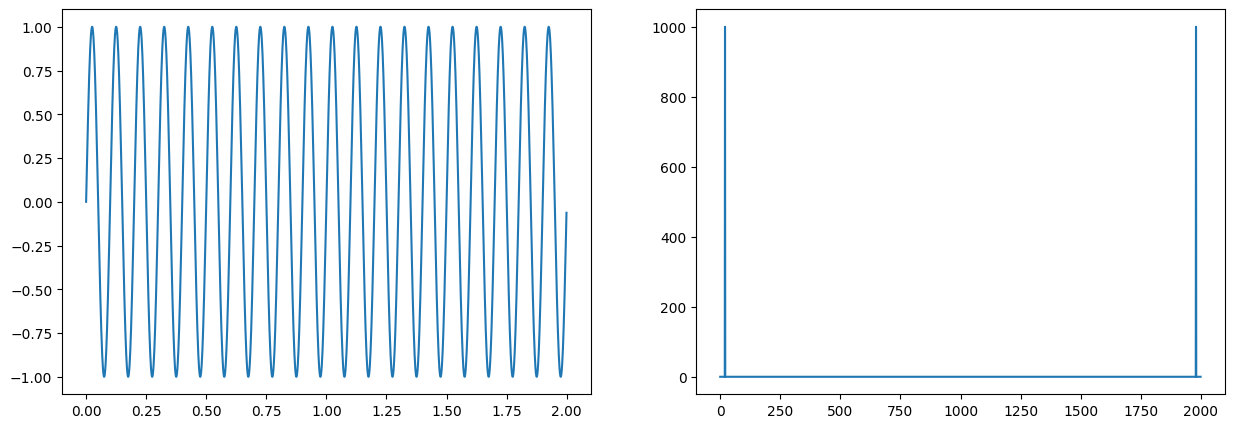

In [ ]:
import time
import cmath
import matplotlib.pyplot as plt


def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
Ts=0.001
t = np.arange(0,2,Ts)
f0 = 10
x = np.sin(2*np.pi*f0*t)
N = x.shape[0]

start = time.time()
Xk = DFT_slow(x)
end = time.time()
print('Time:', end - start)
f = np.arange(0, 1/Ts)
# plot
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(t,x)
plt.subplot(1,2,2)
plt.plot(abs(Xk))



**Обратное дискретное преобразование Фурье (ОДПФ):**

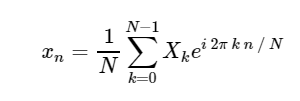

In [ ]:
# обратное
def IDFT_slow(Xk):
    """Compute the inverse discrete Fourier Transform of the 1D spectrum Xk"""
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)/N
    return np.dot(M, Xk)

s = IDFT_slow(Xk)
plt.plot(s)

**БЫСТРОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(64, 16)
(128, 8)
(256, 4)
(512, 2)
(1024, 1)


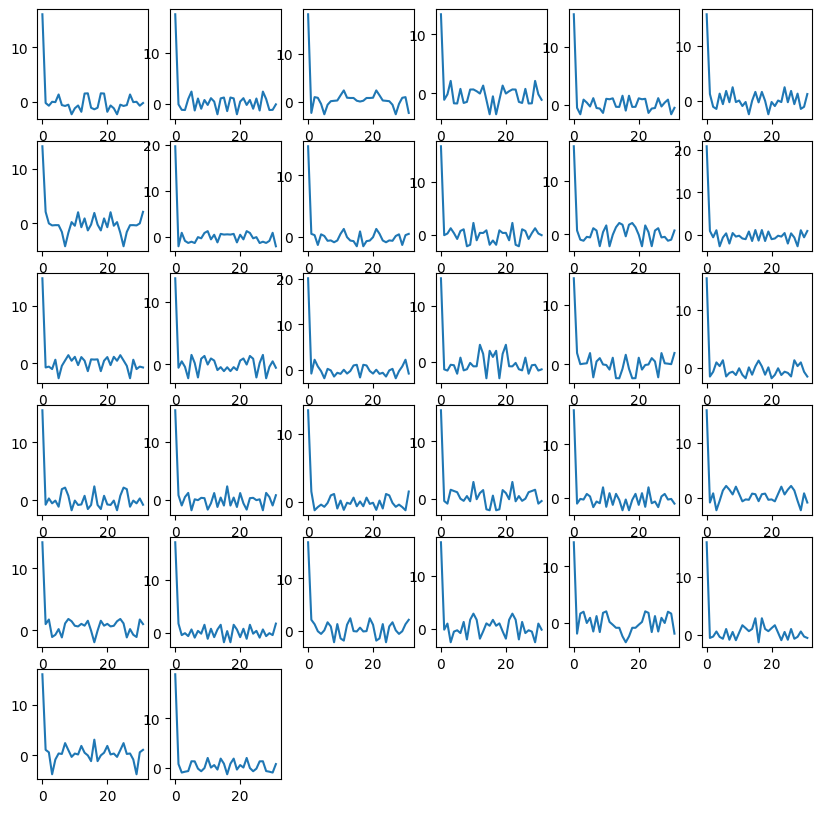

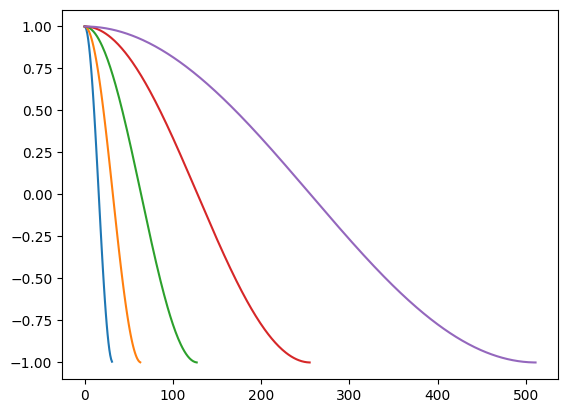

In [119]:
 #"""A vectorized, non-recursive version of the Cooley-Tukey FFT"""
x = np.random.random(1024)
# xzer = np.zeros((2048))
# f = 5
# t = np.arange(0,1,0.001)
# x = np.sin(2*np.pi*f*t) + np.sin(2*np.pi*10*t) + np.sin(2*np.pi*50*t)
# xzer [0:2000] = np.array(list(x) + list(x))
# x = xzer
N = x.shape[0]
if np.log2(N) % 1 > 0:
  raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
N_min = min(N, 32)

# Выполняем дискретное преобразование на 32 точек
n = np.arange(N_min)
k = n[:, None]
M = np.exp(-2j * np.pi * n * k / N_min)

X = np.dot(M, x.reshape((N_min, -1)))
plt.figure(figsize=[10, 10])
for i in range(32):
  plt.subplot(6, 6, i+1)
  plt.plot(X[:, i])
y = x.reshape((N_min, -1))

# build-up each level of the recursive calculation all at once
plt.figure(2)
while X.shape[0] < N:
      X_even = X[:, :round(X.shape[1] / 2)]
      X_odd = X[:, round(X.shape[1] / 2):]
      factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]

      X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])
      X.ravel()
      plt.plot(factor)
      print(X.shape)


**[БЫСТРОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ](https://)**

In [100]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)

    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))


    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]
        X_odd = X[:, X.shape[1] / 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])  # поворотный множитель
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

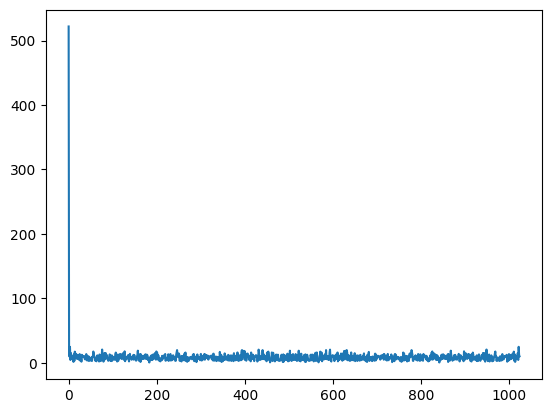

In [ ]:
import numpy as np

sp = np.fft.fft(x)
plt.plot(abs(sp))


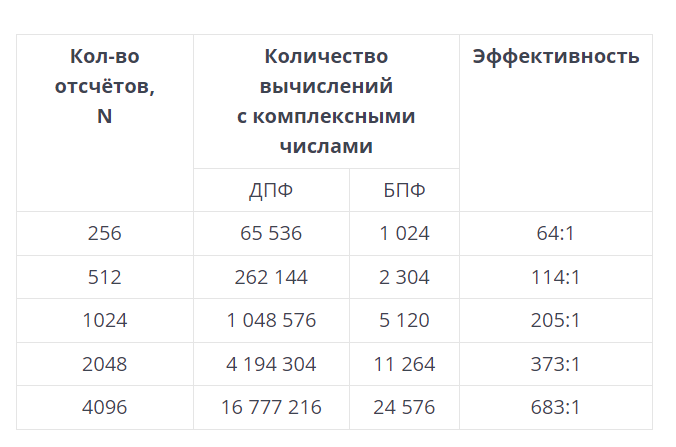

**Numpy.FFT**

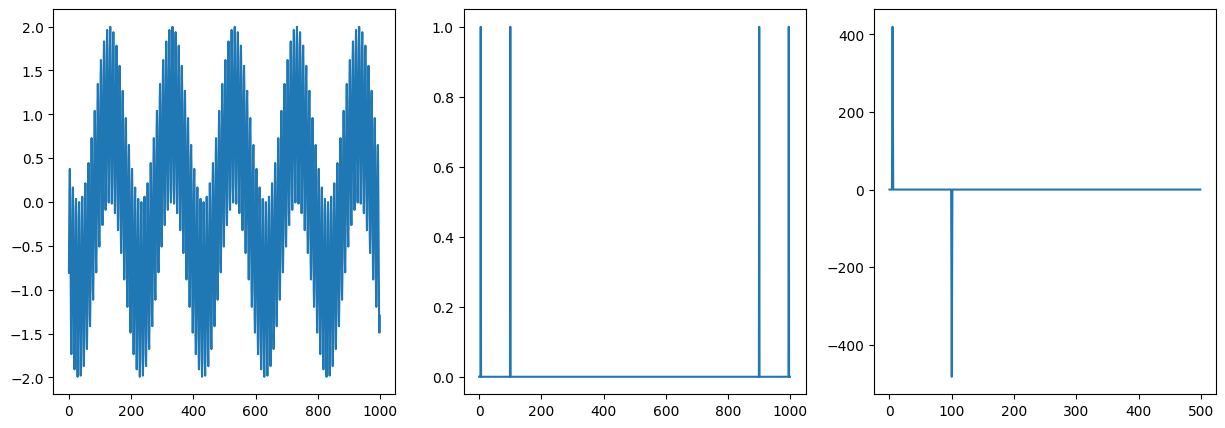

In [158]:
T= 0.001
t = np.arange(0,1,T)
x = np.sin(2*np.pi*5*t + 10) + np.sin(2*np.pi*100*t + 50 )
sp = np.fft.fft(x)

amp_sp = np.abs(sp)

plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.plot(x)

plt.subplot(1, 3, 2)
plt.plot(amp_sp/np.max(amp_sp))

plt.subplot(1, 3, 3)
plt.plot(np.imag(sp)[0:int(len(x)/2)])